In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('TayraWebScrapping.csv')
df.head(8)


,Prices,Estat_types,Descriptions,Locations
0,80DT,Locations de vacances,Appartement S1 luxueux meublé pour vos vacance...,"Tunis, 30 minutes ago"
1,4DT,Autres Immobiliers,immeuble a vendre,"Monastir, an hour ago"
2,1600DT,Appartements,A louer un S+2 avec vue sur lac aux jardins de...,"Tunis, an hour ago"
3,450DT,Terrains et Fermes,ارض بقصور غرناطة,"Sousse, an hour ago"
4,1600DT,Appartements,Un grand S plus Trois Haut Standing,"Monastir, 2 hours ago"
5,290000DT,Maisons et Villas,Villa inachevée à cité Olympique,"Sousse, 2 hours ago"
6,100DT,Locations de vacances,location vacances appartement deux chambres sa...,"Tunis, 2 hours ago"
7,2700DT,Maisons et Villas,A LOUER étage villà s3 à la marsa vue panoramique,"Tunis, 2 hours ago"


In [4]:
df['Locations']=df['Locations'].str.split(',').str[0]

In [5]:
df['Prices']=df['Prices'].str.replace('DT','')

In [6]:
df=df.rename(columns={'Prices':'Prices(DT)'})

In [7]:
UnwantedValues = ['A LOUER' ,'s+2','09']
condition = ~df['Locations'].isin(UnwantedValues)
df=df[condition]

In [8]:
df.head(8)

,Prices(DT),Estat_types,Descriptions,Locations
0,80,Locations de vacances,Appartement S1 luxueux meublé pour vos vacance...,Tunis
1,4,Autres Immobiliers,immeuble a vendre,Monastir
2,1600,Appartements,A louer un S+2 avec vue sur lac aux jardins de...,Tunis
3,450,Terrains et Fermes,ارض بقصور غرناطة,Sousse
4,1600,Appartements,Un grand S plus Trois Haut Standing,Monastir
5,290000,Maisons et Villas,Villa inachevée à cité Olympique,Sousse
6,100,Locations de vacances,location vacances appartement deux chambres sa...,Tunis
7,2700,Maisons et Villas,A LOUER étage villà s3 à la marsa vue panoramique,Tunis


In [9]:
df['Prices(DT)'] = df['Prices(DT)'].astype(int)

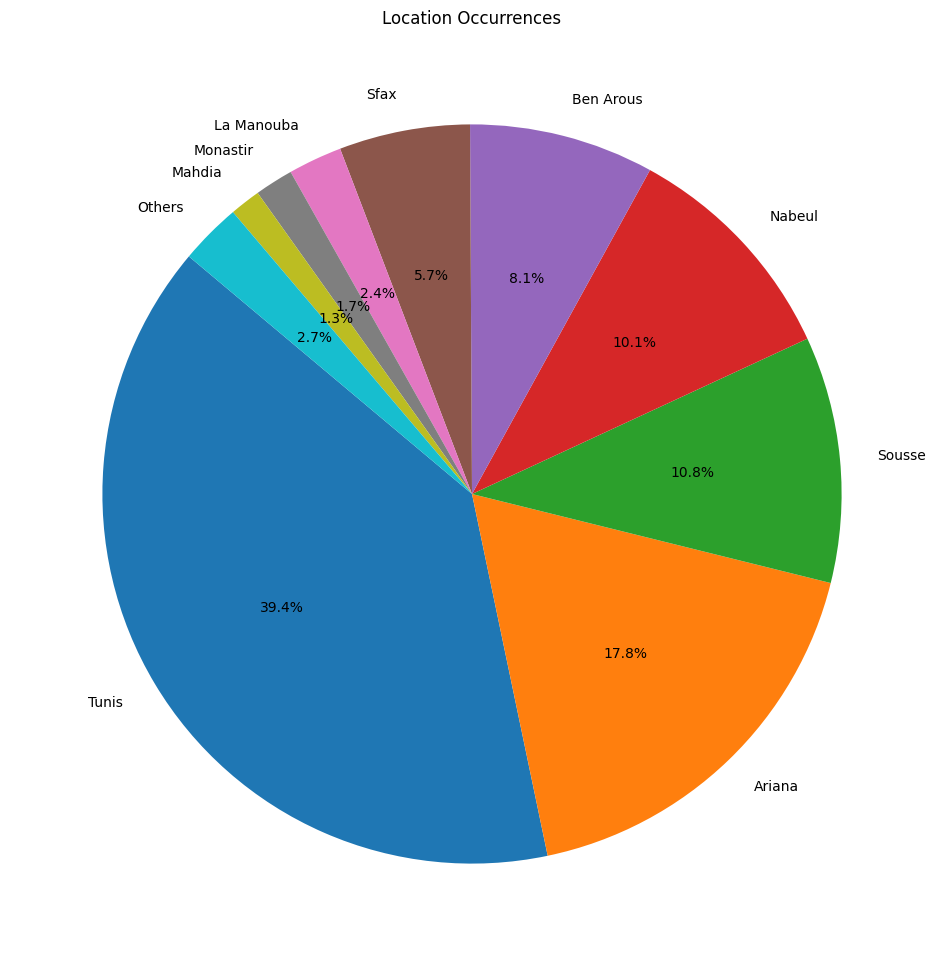

In [12]:
location_counts = df['Locations'].value_counts()
threshold = 0.013 

filtered_location_counts = location_counts[location_counts / location_counts.sum() >= threshold]
filtered_location_counts['Others'] = location_counts[location_counts / location_counts.sum() < threshold].sum()

plt.figure(figsize=(12, 12))
plt.pie(filtered_location_counts, labels=filtered_location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location Occurrences')
plt.show()